### Emotions in Animal Crossing:The Recon
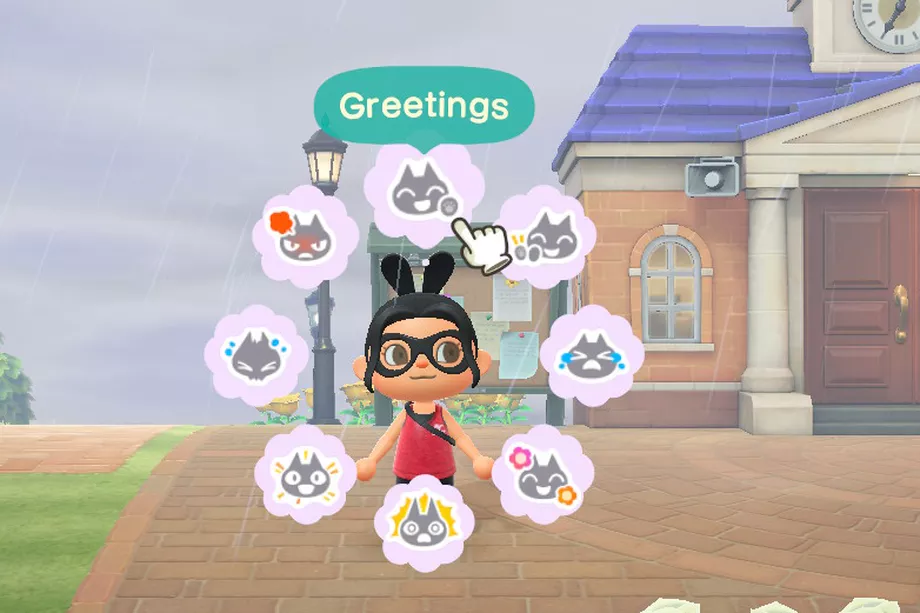<h3>Hello Kaggle! I'm new to coding--just finished a Coursera certification but at a beginner/intermediate level--and looking to develop professionally and personally as a coder. In this little project,I wanted to know how the life simulator game Animal Crossing taught emotions to the player. Emotions in this game are learned through "reactions" taught by animals of different personality types. </h3>
<h3>I wanted to know:<br>
1)which personality types taught which reactions?<br>
2)were there any overall interesting characteristics about the emotions when exploratory analysis was conducted?<br>
read on! any comments, critiques, and expansions would be great. thank you!</h3>
<a href='#fin'>Click here for Conclusions and Summary</a>
(img from Nintendo for Polygon.)

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('all done')

There are 20 csv files in the current version of the dataset:


In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [ ]:
#reading in the dataset
reactionsdf = pd.read_csv("/kaggle/input/reactions.csv")
reactionsdf.head()
reactionsdf.describe(include="all")
reactionsdf.sort_values(by=['Source Notes'])
reactionsdf.head()
reactionsdf.Name

In [ ]:
#to initially get a simple readout, i assigned each of the emotions to "happy" or "sad". 
#i used the general understanding underlying those emotions.
#i.e., shocked implies negativity but amazed implies positivity.
Happies = ['Agreement','Amazed','Confident','Curiosity','Daydreaming','Delight','Dozing','Encouraging','Flourish','Glee','Greetings','Happiness','Inspiration','Intense','Joy','Laughter','Love','Mischief','Pleased','Pride','Showmanship','Sleepy','Surprise','Thought']

In [ ]:
#checking styles to graph results
mpl.style.available

In [ ]:
#apparently there are slightly more happy emotions than sad.
mpl.style.use("fivethirtyeight")
Happies = ['Agreement','Amazed','Confident','Curiosity','Daydreaming','Delight','Dozing','Encouraging','Flourish','Glee','Greetings','Happiness','Inspiration','Intense','Joy','Laughter','Love','Mischief','Pleased','Pride','Showmanship','Sleepy','Surprise','Thought']
def happysad(Name):
    if Name in Happies:
        return "Happy"
    else:
        return "sad"

reactionsdf['cat']=reactionsdf['Name'].apply(happysad)
reactionsdf['cat'].value_counts().plot(kind='bar').set(title="happysads")

In [ ]:
#the ones requiring high level of friendship are all Happy.
reactionsdf.sort_values(by = 'Source Notes')

In [ ]:
#the ones that All personalities can teach you are all Happy as well.
reactionsdf.sort_values(by=['Source','Name'])

In [ ]:
#here, we use the default .plot which is matplotlib anyway. 
#i used a line of code incorporating multiple commands.
mpl.style.use('fivethirtyeight')
data = reactionsdf.groupby(by='Source')['cat'].value_counts(normalize=True)
plt=data.unstack().plot(kind='bar',stacked=True,title="Emotions").set(xlabel="Source",ylabel='% of Happy and Sad')

In [ ]:
#here, we use the default.plot which is matplotlib anyway. 
#here, i deconstructed the last commands to try and see where the .legend command could fit. 
#still no luck with the .legend command, setting ax, using plt. commands. i'm sure i'm missing something?
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('fivethirtyeight')
reactionsdf.groupby(by='Source')['cat'].value_counts(normalize=True)
reactionsdf1 = reactionsdf[['Name','Source','cat']]
rxn1 = reactionsdf1.groupby(by='Source')['cat'].value_counts(normalize=True)
rxn1 = rxn1.to_frame()
rxn1 = rxn1.unstack()
rxn1.plot(kind='bar',stacked=True).set(title='Emotions')

In [ ]:
#unstacking a dataframe turns it into a series?
#performing groupby operations on a dataframe turns it into a series?
g = rxn1.columns.levels
g
# the above returns column levels
rxn2 = rxn1.unstack()
gg = rxn2.columns.levels
#the above does not, stating the object is a series.

<a id = fin><h2>Conclusions:</h2></a>
1. More happy than sad emotions were taught.<br>
2. The emotions requiring a high degree of friendship are all happy.<br>
3. A cursory visual examination of the graph's Happy to Sad ratios shows that the "Peppy" animals had the highest happy-to-sad ratio, and<br>
the "Lazy" animals the lowest. 

<h2>Future Directions</h2>
1. statistical analysis of happy/sad ratios between personality types: what's a significant trend?<br>
2. expand analysis to include any information on how Nintendo planned this aspect of Animal Crossing.<br>
3.Psychological profiling across personality types and also, a lot more n's if possible, if this analysis is going to be robust.<br>
4.create a personality profile predicting which villagers a player would like the most as neighbors. the player would take a (hopefully) entertaining quiz to establish their profile.<br>

<h2>Technical Issues:</h2>
1.Not clear on the full range of multilevel indexing and graph commands used together. for instance, why am i not able to manipulate the legend on the graph despite trying: setting ax, plt.legend? Seaborn requires a dataframe which brings me to:<br>
2.apparently any groupby operation performed with value_counts results in a series. not sure why this is but it is complicating 1, and attempts to convert series to df aren't recognized as df by the graph commands. 